### IDs:
Insert yours IDs to the cell below

ID #1: 346725658 

ID #2: 032480253


In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import random
import math

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

**Solution:** The probability P of having k successes within n independent trials is:
$$P(Y=k) = {n \choose k}  p^k (1-p)^{(n-k)}$$ 
In this case, we are interested in the probability of having 0 successes, since $$P(Y \leqq 1)=1-P(Y=0)=1-0.85=0.15$$
Therefore, by substituting k=0 on the right side of the equation and isolating n we get:
$$n=\frac{ln(0.15)}{ln(0.97)}=62.3$$

In [2]:
def get_independent_samples(desired_prob=0.85, prob_of_defect=0.03):

    # The probability of having at least one defective product is the same as 1-P(X=0)=1-0.85=0.15
    n = 1 # Start counting the number of independent samples 
    run = True
    while run == True:

        # Isolating the n in the function of the binomial distribution for k=0 successes
        if n > math.log(1-desired_prob)/math.log(1-prob_of_defect):
            run = False
        else:
            n += 1
    return n

get_independent_samples()

63

Consequently, we should ask for 63 samples in order to have a 85% probability of having at least one defective product in the batch

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

**Solution:** Use the same function get_independent_samples() changing the parameters of desired_prob and prob_of_defect

In [3]:
get_independent_samples(0.95,0.04)

74

We should ask for 74 samples in order to have 95% probability of at least one defective product in the batch considering that products are 4% defective.

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

**Solution:** The negative binomial distribution is applied to both cases since it describes the distribution of the number of trials needed until the $r^{th}$ success in successive Bernouilli instances. We use the Probability Point Function (PPF) from scipy.stats to get the exact point where the probability of everything to the left is equal to the desired percentile. Therefore, PPF is the inverse of CDF, since it returns the value of a given percentile of data. The $loc$ parameter is used to set the function to the number of attempts and not the number of failures (as it is originally set on scipy).

In [4]:
result1 = stats.nbinom.ppf(q=0.9, n=5, p=0.1, loc=5)
print(f'For case 1 we need {result1} independent samples')

For case 1 we need 78.0 independent samples


In [5]:
result2 = stats.nbinom.ppf(q=0.9, n=15, p=0.3, loc=15)
print(f'For case 2 we need {result2} independent samples')

For case 2 we need 64.0 independent samples


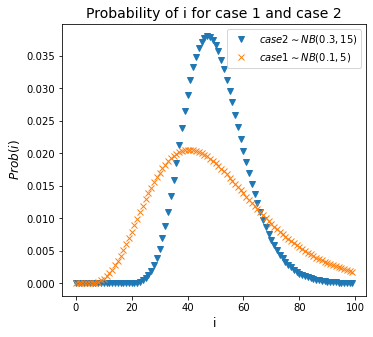

In [9]:
# Probability graph
r=5
p=0.1
m=3

case1 = stats.nbinom(r,p, loc=r)
case2 = stats.nbinom(r*m, p*m, loc=m*r)

i = range(0,int(np.round(2*r/p,0)))

p_case1_i = case1.pmf([xx for xx in i])
p_case2_i = case2.pmf([xx for xx in i])

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(i, p_case2_i, 'v', label = "$case2\sim NB({{{0}}},{{{1}}})$".format(round(p*m,2),r*m))
plt.plot(i, p_case1_i, 'x', label = "$case1\sim NB({{{0}}},{{{1}}})$".format(p,r))
plt.xlabel("i",fontsize=12)
plt.ylabel('$Prob(i)$', fontsize=12)
plt.title("Probability of i for case 1 and case 2", fontsize=14)
plt.legend()

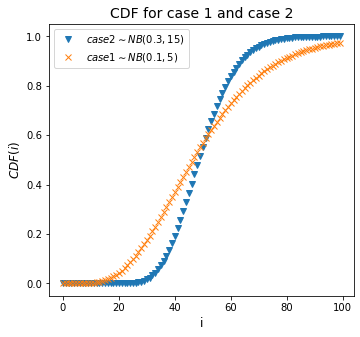

In [10]:
# CDF graph
r=5
p=0.1
m=3

case1 = stats.nbinom(r,p, loc=r)
case2 = stats.nbinom(r*m, p*m, loc=m*r)

i = range(0,int(np.round(2*r/p,0)))

p_case1_i = case1.cdf([xx for xx in i])
p_case2_i = case2.cdf([xx for xx in i])

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(i, p_case2_i, 'v', label = "$case2\sim NB({{{0}}},{{{1}}})$".format(round(p*m,2),r*m))
plt.plot(i, p_case1_i, 'x', label = "$case1\sim NB({{{0}}},{{{1}}})$".format(p,r))
plt.xlabel("i",fontsize=12)
plt.ylabel('$CDF(i)$', fontsize=12)
plt.title("CDF for case 1 and case 2", fontsize=14)
plt.legend()

In [11]:
# Calculate expected value and variance
mean_case1, var_case1 = stats.nbinom.stats(n=5,p=0.1,loc=5, moments='mv')
mean_case2, var_case2 = stats.nbinom.stats(n=15,p=0.3,loc=15, moments='mv')
#var_case2 = np.var(p_case2_i)
print(f'Expected value of case 1: {mean_case1}, Variance of case 1: {var_case1}')
print(f'Expected value of case 2: {mean_case2}, Variance of case 2: {var_case2}')

Expected value of case 1: 50.0, Variance of case 1: 449.9999999999999
Expected value of case 2: 50.0, Variance of case 2: 116.66666666666667


Both cases have a similar expected value of 50, however the variance of case 1 is bigger than the variance of case 2. This result is confirmed by the CDF graph, since the slope of the curve for case 2 is steeper. Steeper slopes indicate a tighter range of values and therefore lower variability.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenario of possible distributions of rent in the two towns.
Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [12]:
#Declaring variables
n_sh = 16000
mean_sh = 6300
median_sh = 4600
n_rg = 22000
mean_rg = 4200
median_rg = 4600

#Scenario 1
sh_array = np.array([1000, 1500, 1700, 2900, 3300, 4600, 4800, 5500, 10000, 14000, 20000]* int(n_sh/11))
rg_array = np.array([50, 100, 200, 300, 500, 4600, 5000, 5250, 9200, 10000, 11000]* int(n_rg/11))
iqr_sh = stats.iqr(sh_array)
iqr_rg = stats.iqr(rg_array)
print("Scenario 1:")
print(f'IQR of SH:{iqr_sh}, mean of SH: {np.mean(sh_array)}, median of SH: {np.median(sh_array)}')
print(f'IQR of RG:{iqr_rg}, mean of RG: {np.mean(rg_array)}, median of RG: {np.median(rg_array)}')

Scenario 1:
IQR of SH:8300.0, mean of SH: 6300.0, median of SH: 4600.0
IQR of RG:9000.0, mean of RG: 4200.0, median of RG: 4600.0


Text(0, 0.5, 'Amount')

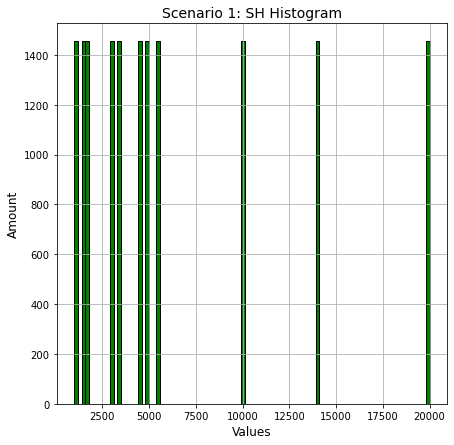

In [14]:
#Histogram SH, scenario 1
import pandas as pd
pd.DataFrame(sh_array).hist(bins=100, color="green", figsize=(7,7), edgecolor="black", linewidth=1)
plt.title('Scenario 1: SH Histogram', fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Amount", fontsize=12)

Text(0, 0.5, 'Amount')

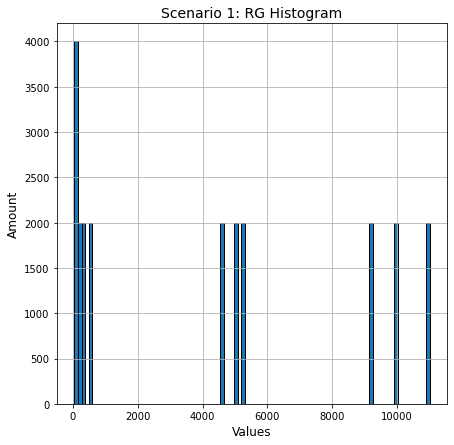

In [15]:
#Histogram RG, scenario 1
pd.DataFrame(rg_array).hist(bins=100, figsize=(7,7), edgecolor="black", linewidth=1)
plt.title('Scenario 1: RG Histogram', fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Amount", fontsize=12)

In [17]:
#Scenario 2
sh2_array = np.array([500, 1700, 1800, 3000, 3100, 4600, 5800, 7500, 8000, 19000, 19800]* int(n_sh/11))
rg2_array = np.array([200, 400, 400, 600, 900, 4600, 4800, 5200, 9000, 9500, 10600]* int(n_rg/11))
iqr_sh2 = stats.iqr(sh2_array)
iqr_rg2 = stats.iqr(rg2_array)
print("Scenario 2:")
print(f'IQR of SH:{iqr_sh2}, mean of SH: {np.mean(sh2_array)}, median of SH: {np.median(sh2_array)}')
print(f'IQR of RG:{iqr_rg2}, mean of RG: {np.mean(rg2_array)}, median of RG: {np.median(rg2_array)}')

Scenario 2:
IQR of SH:6200.0, mean of SH: 6800.0, median of SH: 4600.0
IQR of RG:8600.0, mean of RG: 4200.0, median of RG: 4600.0


Text(0, 0.5, 'Amount')

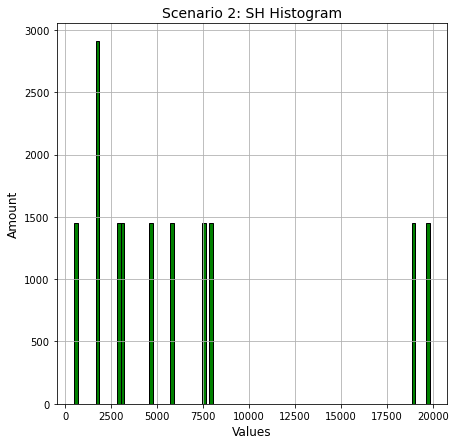

In [18]:
#Histogram SH, scenario 2
import pandas as pd
pd.DataFrame(sh2_array).hist(bins=100, color="green", figsize=(7,7), edgecolor="black", linewidth=1)
plt.title('Scenario 2: SH Histogram', fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Amount", fontsize=12)

Text(0, 0.5, 'Amount')

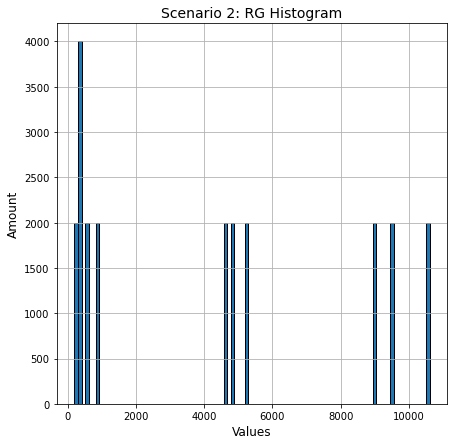

In [19]:
#Histogram RG, scenario 2
pd.DataFrame(rg2_array).hist(bins=100, figsize=(7,7), edgecolor="black", linewidth=1)
plt.title('Scenario 2: RG Histogram', fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Amount", fontsize=12)

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [20]:
sh3_array = np.array([1100, 1200, 1800, 3000, 3200, 4600, 6900, 7400, 8200, 17700, 19700]* int(n_sh/11))
rg3_array = np.array([200, 400, 500, 600, 800, 4600, 5000, 6300, 8000, 9300, 10500]* int(n_rg/11))
iqr_sh3 = stats.iqr(sh3_array)
iqr_rg3 = stats.iqr(rg3_array)
sh3_var = np.var(sh3_array)
rg3_var = np.var(rg3_array)
print("Scenario 3:")
print(f'IQR of SH:{iqr_sh3}, mean of SH: {np.mean(sh3_array)}, median of SH: {np.median(sh3_array)}, variance of SH: {sh3_var}')
print(f'IQR of RG:{iqr_rg3}, mean of RG: {np.mean(rg3_array)}, median of RG: {np.median(rg3_array)}, variance of RG: {rg3_var}')

Scenario 3:
IQR of SH:6400.0, mean of SH: 6800.0, median of SH: 4600.0, variance of SH: 37149090.90909091
IQR of RG:7500.0, mean of RG: 4200.0, median of RG: 4600.0, variance of RG: 14000000.0


Text(0, 0.5, 'Amount')

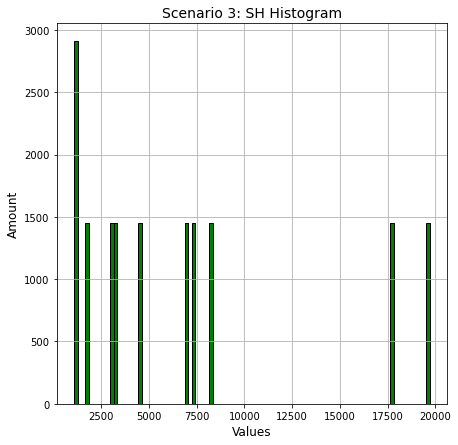

In [22]:
#Histogram SH, scenario 3
pd.DataFrame(sh3_array).hist(bins=100, color="green", figsize=(7,7), edgecolor="black", linewidth=1)
plt.title('Scenario 3: SH Histogram', fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Amount", fontsize=12)

Text(0, 0.5, 'Amount')

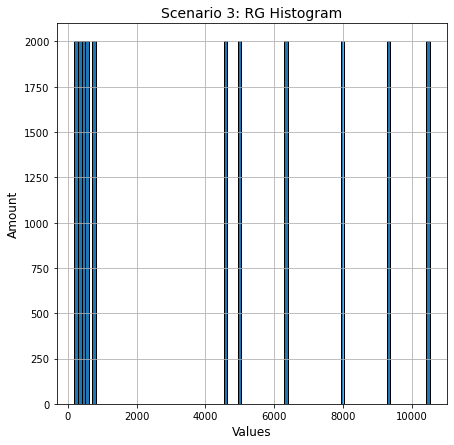

In [23]:
#Histogram RG, scenario 3
pd.DataFrame(rg3_array).hist(bins=100, figsize=(7,7), edgecolor="black", linewidth=1)
plt.title('Scenario 3: RG Histogram', fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Amount", fontsize=12)

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [24]:
# Declare variables
#mean_phi_rg = 8500
#median_phi_rg = 8000
alpha_sh = 0.97
alpha_rg = 0.89

# Create arrays for PHI
phi_sh = np.array([1500, 4000, 7000, 8000, 10000, 12000, 13000, 15000, 19000, 23000,25000] * int(n_sh/11))
mean_phi_sh = np.mean(phi_sh)
median_phi_sh = np.median(phi_sh)
phi_rg = np.array([1000, 2200, 5000, 6000, 7800, 8000, 9000, 10000, 11500, 14000, 19000] * int(n_rg/11))
mean_phi_rg = np.mean(phi_rg)
median_phi_rg = np.median(phi_rg)

print("Per Household Income:")
print(f'Mean of PHI of SH: {mean_phi_sh}, median of PHI of SH: {np.median(median_phi_sh)}')
print(f'Mean of PHI of RG: {mean_phi_rg}, median of PHI of SH: {np.median(median_phi_rg)}')

Per Household Income:
Mean of PHI of SH: 12500.0, median of PHI of SH: 12000.0
Mean of PHI of RG: 8500.0, median of PHI of SH: 8000.0


In [25]:
# Produce rent data for the two cities
sh4_array = np.array([800, 1500, 1500, 2800, 3700, 4600, 6900, 8400, 11200, 15700, 17700]* int(n_sh/11))
rg4_array = np.array([100, 350, 550, 700, 1000, 4600, 4800, 7300, 8000, 9300, 9500]* int(n_rg/11))
print("Scenario for covariance calculation:")
print(f'Mean of SH: {np.mean(sh4_array)}, median of SH: {np.median(sh4_array)}')
print(f'Mean of RG: {np.mean(rg4_array)}, median of RG: {np.median(rg4_array)}')

Scenario for covariance calculation:
Mean of SH: 6800.0, median of SH: 4600.0
Mean of RG: 4200.0, median of RG: 4600.0


In [26]:
# Calculate covariance with the provided formula
cov_sh = alpha_sh * ((np.var(sh4_array))**0.5) *  ((np.var(phi_sh))**0.5)
cov_rg = alpha_rg * ((np.var(rg4_array))**0.5) *  ((np.var(phi_rg))**0.5)

print(f"The covariance of the rent and PHI for SH is {cov_sh}")
print(f"The covariance of the rent and PHI for RG is {cov_rg}")

The covariance of the rent and PHI for SH is 38812923.498547904
The covariance of the rent and PHI for RG is 15986253.49949654


In [27]:
# Compute covariance with np.cov
computed_cov_sh = np.cov(sh4_array,phi_sh)[0,1] #the element in [0,1] shows the correlation between the variables
computed_cov_rg = np.cov(rg4_array,phi_rg)[0,1]
print(f"The computed correlation for rent and PHI in SH is {computed_cov_sh}")
print(f"The computed correlation for rent ans PHI in RG is {computed_cov_rg}")

The computed correlation for rent and PHI in SH is 39038804.47695867
The computed correlation for rent ans PHI in RG is 16238919.95090686


In [28]:
# Get the deviation between the covariances
dev_cov_sh = cov_sh/computed_cov_sh
dev_cov_rg = cov_rg/computed_cov_rg
print(f"The deviation between covariances for SH is {dev_cov_sh}")
print(f"The deviation between covariances for RG is {dev_cov_rg}")

The deviation between covariances for SH is 0.9942139370957406
The deviation between covariances for RG is 0.9844406861925439


Therefore, the deviation between the covariances calculated for each city are in fact less than 1% given the $\alpha$ values provided. For both cities, the rent has a positive correlation with the per household income, which in other words means that when rent increases so does the per household income.

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

**Solution:** We create two heatmaps for each city considering two resolutions (with 10 bins and 5 bins) in order to deliver a better picture of how the rent and the per household income variables are aggregated for each city.

Text(0, 0.5, 'Counted points')

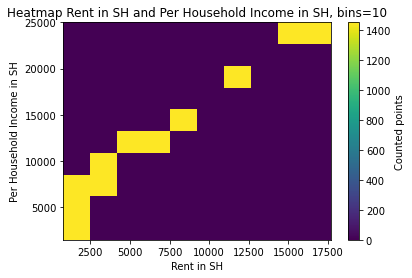

In [31]:
# SH with resolution bins=10
fig2 = plt.figure()
plt.hist2d(sh4_array, phi_sh, bins=10)
plt.xlabel('Rent in SH')
plt.ylabel('Per Household Income in SH')
plt.title("Heatmap Rent in SH and Per Household Income in SH, bins=10",fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counted points')

Text(0, 0.5, 'Counted points')

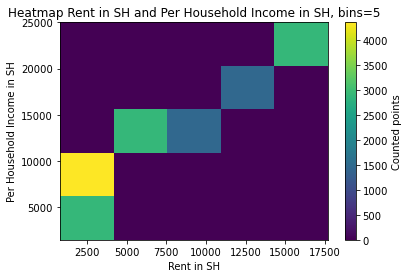

In [32]:
# SH with resolution bins=5
fig2 = plt.figure()
plt.hist2d(sh4_array, phi_sh, bins=5)
plt.xlabel('Rent in SH')
plt.ylabel('Per Household Income in SH')
plt.title("Heatmap Rent in SH and Per Household Income in SH, bins=5",fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counted points')

Text(0, 0.5, 'Counted points')

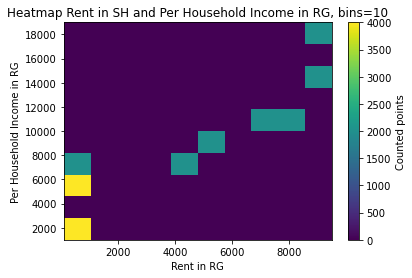

In [33]:
# RG with resolution bins=10
fig2 = plt.figure()
plt.hist2d(rg4_array, phi_rg, bins=10)
plt.xlabel('Rent in RG')
plt.ylabel('Per Household Income in RG')
plt.title("Heatmap Rent in SH and Per Household Income in RG, bins=10",fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counted points')

Text(0, 0.5, 'Counted points')

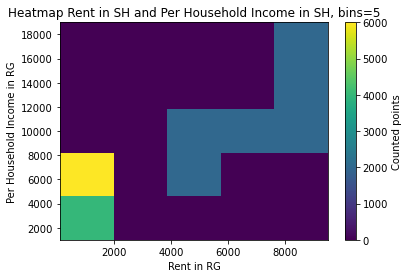

In [34]:
# RG with resolution bins=5
fig2 = plt.figure()
plt.hist2d(rg4_array, phi_rg, bins=5)
plt.xlabel('Rent in RG')
plt.ylabel('Per Household Income in RG')
plt.title("Heatmap Rent in SH and Per Household Income in SH, bins=5",fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counted points')

From the heatmaps we can appreciate that in SH most of the data (around 4000 counted points) is in the yellow pixel that corresponds to rent less than 5000 and phi between 6000 and 11000. This result comes from the heatmap with resolution of bins = 5, since the resolution of bins = 10 doesn't provide much information.

On the other hand, the majority of the data (around 6000 counted points) corresponding to RG is for a value of rent less than 2000 and a phi between 5000 and 8000. 

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [35]:
#Define the variables
n = 20
p = np.array([0.2,0.1,0.1,0.1,0.2,0.3])

np.random.seed(10)
#Create k = 100 experiments
experiments = np.random.multinomial(n,p,100)
experiments

array([[ 5,  0,  2,  3,  4,  6],
       [ 3,  1,  3,  1,  3,  9],
       [ 5,  4,  0,  2,  5,  4],
       [ 4,  3,  1,  4,  4,  4],
       [ 4,  1,  2,  3,  4,  6],
       [ 4,  2,  2,  2,  4,  6],
       [ 6,  2,  3,  1,  1,  7],
       [ 3,  1,  4,  0,  5,  7],
       [ 4,  3,  1,  3,  3,  6],
       [ 5,  1,  4,  1,  2,  7],
       [ 3,  0,  4,  1,  4,  8],
       [ 7,  5,  1,  2,  1,  4],
       [ 4,  4,  2,  2,  1,  7],
       [ 3,  0,  2,  2,  7,  6],
       [ 1,  2,  2,  3,  4,  8],
       [ 1,  4,  3,  4,  3,  5],
       [ 4,  2,  2,  1,  4,  7],
       [ 1,  2,  1,  3,  5,  8],
       [ 4,  1,  0,  6,  3,  6],
       [ 4,  5,  1,  1,  4,  5],
       [ 4,  3,  0,  2,  6,  5],
       [ 5,  2,  0,  2,  5,  6],
       [ 3,  2,  3,  1,  2,  9],
       [ 3,  1,  1,  4,  4,  7],
       [ 3,  3,  0,  3,  4,  7],
       [ 4,  1,  1,  3,  2,  9],
       [ 3,  2,  1,  2,  7,  5],
       [ 7,  2,  2,  0,  7,  2],
       [ 4,  3,  2,  3,  3,  5],
       [ 5,  1,  2,  3,  2,  7],
       [ 4

In [36]:
#Get y
y_list = []
for experiment in experiments:    
    y = experiment[1]+experiment[2]+experiment[3]
    y_list.append(y)
y_arr= np.array(y_list)
y_arr

array([ 5,  5,  6,  8,  6,  6,  6,  5,  7,  6,  5,  8,  8,  4,  7, 11,  5,
        6,  7,  7,  5,  4,  6,  6,  6,  5,  5,  4,  8,  6,  6,  5,  3,  6,
        8,  6,  4,  4,  4,  7,  7,  8,  9,  1,  6,  5,  8,  6,  7,  7,  6,
        8,  8,  9,  5,  7,  9,  6,  7,  4,  6,  5,  6,  3,  5,  8,  4,  5,
        8,  5,  8,  9,  7,  6,  6,  5,  6,  3,  2,  5,  8,  6,  5,  7,  4,
        5, 11,  3,  5,  5,  5,  9,  8,  8,  6,  6,  4,  5,  5,  5])

In [37]:
print(f'The minumum value of Y is {y_arr.min()}, the maximum is {y_arr.max()} and the sample mean is {y_arr.mean()}')

The minumum value of Y is 1, the maximum is 11 and the sample mean is 6.01


In [38]:
from scipy.stats import moment
print(moment(y_arr,moment=3))

1.0573020000000026


In [39]:
print(np.mean(y_arr))
print(np.median(y_arr))
print(stats.mode(y_arr))

6.01
6.0
ModeResult(mode=array([5]), count=array([25]))


The third moment corresponds to the skewness, which is a measure of assymetry. When the mean is equal to the median and the mode there is no skew. In this case, the mean is bigger than the median by 0.1 and the median is bigger than the mode by 1, so there is a positive skew.

The resulting array of y can also be considered as a binomial distribution of n=100 trials of p=0.1 since the numbers vary from 1 to 11 and therefore have a 1/10 chance of being a certain number. Also, the events X1, X2 and X3 from which Y is computed had the same probability of 0.1. The third moment of a binomial distribution can be calculated as follows:
$$ n*p*(1-p)*(1-2p) $$

In [40]:
third_moment = 100*0.1*(1-0.1)*(1-2*0.1)
third_moment

7.2

When substracting the mean to the result, we get:

In [41]:
print(third_moment-np.mean(y_arr))

1.1900000000000004


The previous result is similar to the computed third central moment since we get a difference of around 0.133. This very low difference between the results is due to the fact that the multinomial distribution is a generalization of the binomial distribution. As explained before, the array y is a binomial distribution with parameters n=100 and p=0.1, so it is expected that we get a similar result when calculating the third central moment.

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

**Solution:** Assuming that the means are zero, the sum of the variance of $X_n$ random variables is equal to:
$$Var(X_1+X_2+...+X_n) = E[(X_1+X_2+...+X_n)^2]$$ 
$$=E[\sum_{i=1}^{n}{X_i}^2+\sum_{i=1,j=1,j\neq{i}}^{n}{X_iX_j}]$$
Using linearity to move the expectation inside the summation we get:
$$=\sum_{i=1}^{n}{E[{X_i}^2]}+\sum_{i=1,j=1,j\neq{i}}^{n}{E[{X_iX_j}]}$$
Since we assumed that the means are equal to zero, the previous result is equivalent to:
$$=\sum_{i=1}^{n}{Var(X_i)}+\sum_{i=1,j=1,j\neq{i}}^{n}{Cov(X_iX_j)}$$
This final conclusion is also valid for when the means are different to zero. 
Applying the obtained result to the case of the variance of the sum of three random variables:
$$Var(X+Y+Z)=Var(X)+Var(Y)+Var(Z)+2Cov(X,Y)+2Cov(X,Z)+2Cov(Y,Z)$$

If X, Y and Z are pairwise independent then:
$$P(X\cap Y)=P(X)*P(Y)$$
$$P(X\cap Z)=P(X)*P(Z)$$ 
$$P(Y\cap Z)=P(Y)*P(Z)$$
This also means that the covariances between each pair on the previous result are equal to zero, and the variance of the sum of the events would be equal to the sum of the variance of each event. This is true since pairwise independence is sufficient for the linearity of variances:
$$Var(X+Y+Z)=Var(X)+Var(Y)+Var(Z)$$

However, even if X, Y and Z are pairwise independent this does not necessarily mean that they are collectively independent. For the events to be collectively independent, adding to the conditions of pairwise independence described above, we also need to have:
$$P(X\cap Y\cap Z)=P(X)*P(Y)*P(Z)$$
Therefore, if the equations of pairwise independence hold but this fourth equation doesn't, then the events are pairwise independent but not collectively independent.

For example, let's assume two independent fair coin tosses, where:
* X: first toss is Heads
* Y: second toss is Heads
* Z: both tosses are Heads

In this case, X and Z are pairwise independent since:
$$P(X \cap Z)=\frac{1}{4}=P(X)*P(Z)$$
Similarly X and Y are pairwise independent:
$$P(X \cap Y)=\frac{1}{4}=P(X)*P(Y)$$

Nevertheless, when calculating the probability of all three events:
$$P(X \cap Y \cap Z)=\frac{1}{4}\neq{P(X)*P(Y)*P(Z)=\frac{1}{8}}$$
Therefore, pairwise independence does not necessarily imply collective independence.

A more general example would be considering three pairwise independent binary variables X, Y and Z. In the following table, each row shows the value of each random variable and the associated probability:

|X||Y||Z||Probability|
|-----||-----||-----||-----|
|1/4||1||1||1|
|1/4||1||0||0|
|1/4||0||1||0|
|1/4||0||0||1|

In this example there isn't collective independence since the intersection of all three variables equals to 1/4 and not 1/8

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [42]:
def NFoldConv(P,n):
    random_number_generation = P.rvs(size=n) #generates array of length n of P results
    print(random_number_generation) #only to confirm that the returned value is correct
    Q = 0
    for i in range(len(random_number_generation)):
        Q = Q + random_number_generation[i] #sums the values of the generated array
        i +=1
    return Q

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


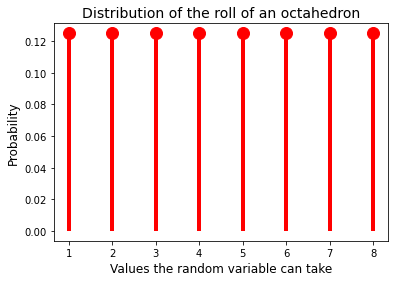

In [46]:
#Define variables for distribution of rolling an octahedron
x = np.arange(1,9) #values that the random variable can take
p = [1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8] #probability of each value the r.v. can take assuming fair octahedron
P_octahedron = stats.rv_discrete(name='P_octahedron',values=(x,p))

#Plot P_octahedron
fig, ax = plt.subplots(1,1)
ax.plot(x, P_octahedron.pmf(x), 'ro', ms=12,mec='r')
ax.vlines(x, 0, P_octahedron.pmf(x), colors='r', lw=4)
plt.xlabel("Values the random variable can take",fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.title("Distribution of the roll of an octahedron",fontsize=14)
plt.show()

In [47]:
# Compute distribution of the sum of the results
NFoldConv(P_octahedron,17)

[1 1 3 1 5 8 4 1 1 1 7 7 1 7 8 4 3]


63

### Question 6 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 6.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

**Solution:** It is a binomial distribution of 10 trials with a probability of success of 0.3. We plot the distribution for 1000 repeated trials.

Text(0.5, 1.0, 'Binomial distribution with n=100 and p=0.3')

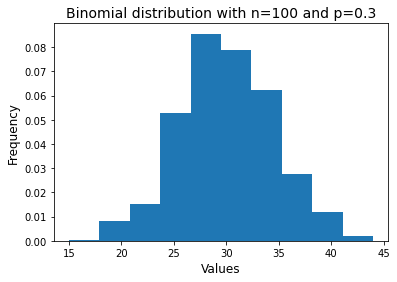

In [48]:
from scipy.stats import binom
data_binom = binom.rvs(n=100,p=0.3, size=1000)
plt.hist(data_binom, density = 'true')
plt.xlabel("Values",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title("Binomial distribution with n=100 and p=0.3",fontsize=14)

#### 6.B
State a formula for comuting $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

In [49]:
#Create a function that calculates the expected value and run it for all combination
def expected_c(n,p):
    #create a binom distribution with the parameters
    dist_binom = stats.binom.rvs(n,p,size=1000)
    #the expected value is the mean
    return np.mean(dist_binom)

In [50]:
n_list = [10,20,50,100]
p_list = [0.1,0.5,0.8]
e_c_list = []
for p in p_list:
    for n in n_list:
        e_c = expected_c(n,p)
        e_c_list.append(e_c)
        print(f"p: {p}, n: {n}, E(c): {e_c}")

p: 0.1, n: 10, E(c): 0.964
p: 0.1, n: 20, E(c): 1.964
p: 0.1, n: 50, E(c): 4.93
p: 0.1, n: 100, E(c): 9.842
p: 0.5, n: 10, E(c): 4.966
p: 0.5, n: 20, E(c): 9.77
p: 0.5, n: 50, E(c): 25.028
p: 0.5, n: 100, E(c): 50.07
p: 0.8, n: 10, E(c): 7.991
p: 0.8, n: 20, E(c): 15.995
p: 0.8, n: 50, E(c): 39.978
p: 0.8, n: 100, E(c): 79.926


#### 6.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$. 

In [51]:
# Create the tuples with each n, p pair
p_list = [0.1,0.5,0.8]
n_list = [10,20,50,100]

def create_distributions(l1,l2):
    distributions = []
    for p in p_list:
        for n in n_list:        
            distributions.append(tuple((n,p)))
    return distributions

dist1 = create_distributions(p_list,n_list)
dist1

[(10, 0.1),
 (20, 0.1),
 (50, 0.1),
 (100, 0.1),
 (10, 0.5),
 (20, 0.5),
 (50, 0.5),
 (100, 0.5),
 (10, 0.8),
 (20, 0.8),
 (50, 0.8),
 (100, 0.8)]

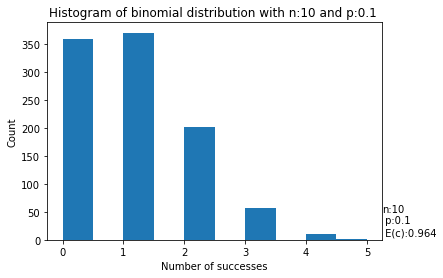

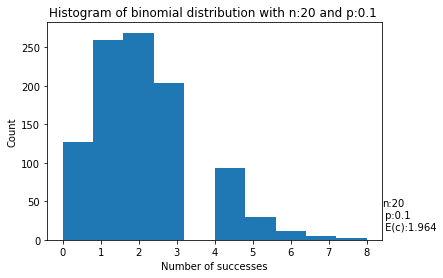

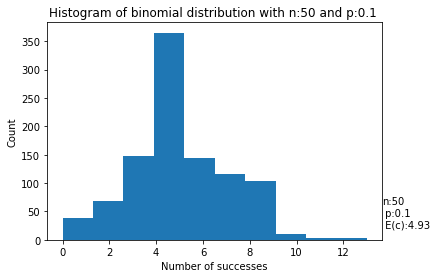

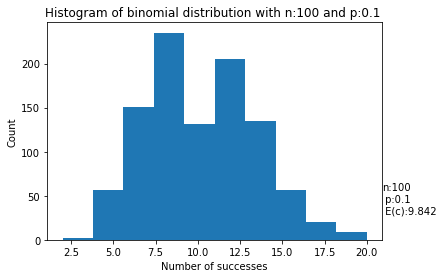

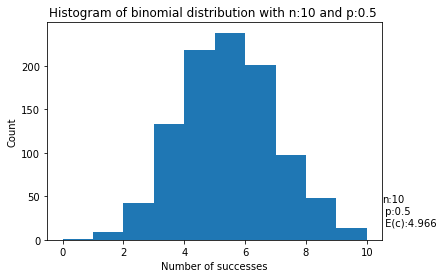

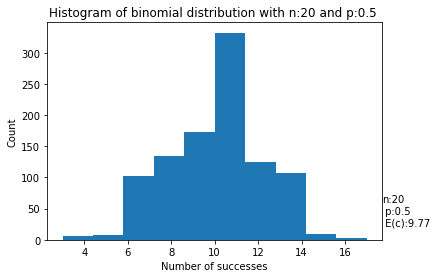

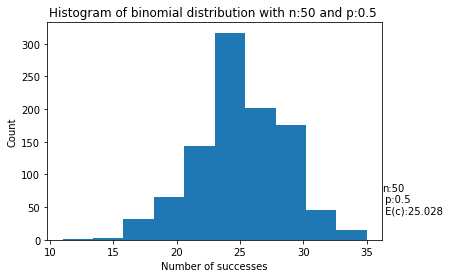

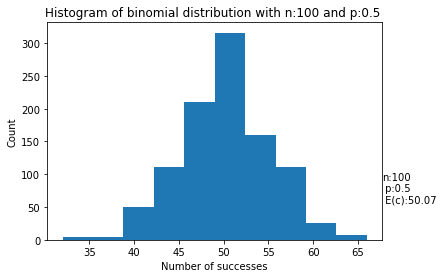

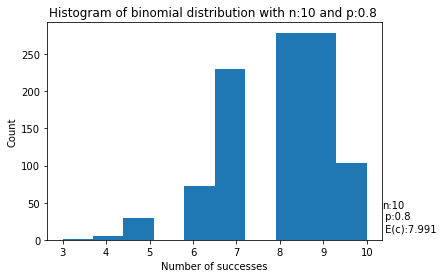

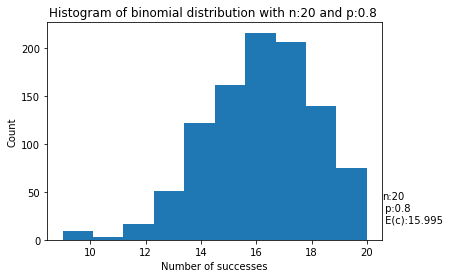

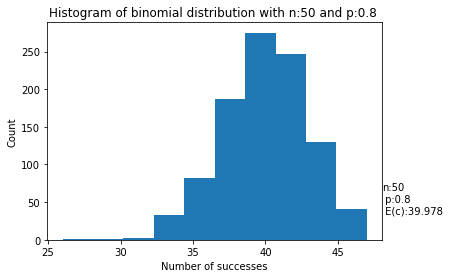

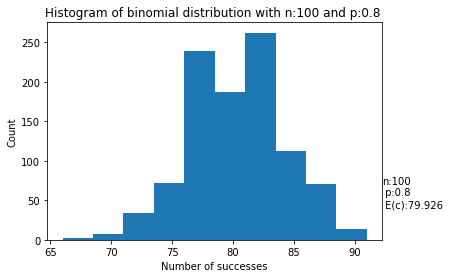

In [67]:
#Save the empirical c and computed c for following question
empirical_c = []
computed_c = []

# Generate the plot for each tuple
for i in range(len(dist1)):
    dist = stats.binom.rvs(n=dist1[i][0],p=dist1[i][1],size=1000)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    n, bins, patches = ax.hist(dist)
    ax.set_xlabel('Number of successes')
    ax.set_ylabel('Count')
    plt.title(f"Histogram of binomial distribution with n:{dist1[i][0]} and p:{dist1[i][1]} ")
    
    #Specify a position relative to the axes rather than the data
    x0, xmax = plt.xlim()
    y0, ymax = plt.ylim()
    data_width = xmax - x0
    data_height = ymax - y0
    ax.text(x0 + data_width * 1, y0 + data_width * 1.5, f"n:{dist1[i][0]}\n p:{dist1[i][1]}\n E(c):{e_c_list[i]}")
    
    #Save the computed c for following question
    computed_c.append(dist1[i][0]*dist1[i][1])
    
    #Plot
    plt.show()

#### 6.D
Use a scatter plot to compare the empirical and the computed values from the previous section

In [55]:
print(e_c_list)
print(computed_c)

[0.964, 1.964, 4.93, 9.842, 4.966, 9.77, 25.028, 50.07, 7.991, 15.995, 39.978, 79.926]
[1.0, 2.0, 5.0, 10.0, 5.0, 10.0, 25.0, 50.0, 8.0, 16.0, 40.0, 80.0]


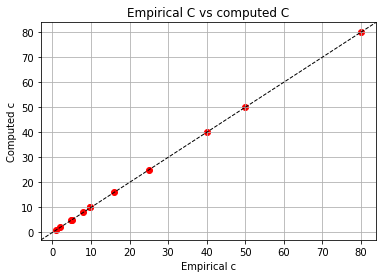

In [56]:
#Create the plot
plt.scatter(e_c_list,computed_c, color='red')
plt.xlabel('Empirical c')
plt.ylabel('Computed c')
plt.title('Empirical C vs computed C')
plt.grid('True')

#Add y=x line
xpoints = ypoints = plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k', lw=1, scalex = False, scaley = False)

The scatter plot shows that the computed c and the empirical c are equivalent. When drawing the y=x line, we can see that all points are within the line, which essentially proves that the y axis (computed c) is equal to the x axis (empirical c). This result matches the result when calculating the deviations, since they are all close to the value of 1.

In [57]:
#Get deviations
deviations = []
for i in range(len(e_c_list)):
    deviation = computed_c[i]/e_c_list[i]
    deviations.append(deviation)
print(deviations)

[1.037344398340249, 1.0183299389002036, 1.0141987829614605, 1.016053647632595, 1.0068465565847764, 1.0235414534288638, 0.9988812529966438, 0.9986019572598362, 1.0011262670504317, 1.0003125976867773, 1.0005503026664666, 1.000925856417186]
